# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#cities[0:3]

['helena', 'saint-philippe', 'mataura']

In [4]:
#build URL for calls
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

#lists for data i need for my dataframe
city_name = []
lat =[]
lng =[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#loop for api calls
print("Beginning Data Retrieval")
print("------------------------------------")
counter = 1
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    #import pdb; pdb.set_trace()


    #Exception script in case the city is not found by the API call
    try:
        #Input data into existing lists
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])           
        print(f"Processing Record # {counter} | {city}")

    except:
        print("City not found...Skipping.........")
    
    #Increase the record count
    counter +=1
    
print("-----------------------------")
print("Data Retrival Complete")
print("-----------------------------")


Beginning Data Retrieval
------------------------------------
Processing Record # 1 | helena
Processing Record # 2 | saint-philippe
Processing Record # 3 | mataura
Processing Record # 4 | victoria
City not found...Skipping.........
Processing Record # 6 | thompson
Processing Record # 7 | tabou
Processing Record # 8 | mozarlandia
Processing Record # 9 | tigil
Processing Record # 10 | port alfred
Processing Record # 11 | hermanus
Processing Record # 12 | ucluelet
Processing Record # 13 | ushuaia
Processing Record # 14 | yurga
Processing Record # 15 | vaini
Processing Record # 16 | arraial do cabo
Processing Record # 17 | albanel
Processing Record # 18 | saint george
Processing Record # 19 | ratnagiri
City not found...Skipping.........
City not found...Skipping.........
Processing Record # 22 | severo-kurilsk
Processing Record # 23 | kahului
Processing Record # 24 | atuona
Processing Record # 25 | walvis bay
Processing Record # 26 | rikitea
Processing Record # 27 | sibolga
Processing Reco

Processing Record # 235 | nikolskoye
Processing Record # 236 | bonavista
City not found...Skipping.........
Processing Record # 238 | lorengau
Processing Record # 239 | paamiut
Processing Record # 240 | strezhevoy
Processing Record # 241 | tecoanapa
Processing Record # 242 | mar del plata
City not found...Skipping.........
Processing Record # 244 | sao jose da coroa grande
Processing Record # 245 | babstovo
City not found...Skipping.........
Processing Record # 247 | kavieng
Processing Record # 248 | arlit
Processing Record # 249 | moussoro
Processing Record # 250 | huaral
Processing Record # 251 | port blair
Processing Record # 252 | kirensk
Processing Record # 253 | neiafu
Processing Record # 254 | sangar
Processing Record # 255 | grindavik
Processing Record # 256 | korla
Processing Record # 257 | tuatapere
Processing Record # 258 | coolum beach
Processing Record # 259 | muisne
Processing Record # 260 | kloulklubed
Processing Record # 261 | prince rupert
Processing Record # 262 | kas

Processing Record # 468 | cockburn town
Processing Record # 469 | najran
Processing Record # 470 | belyy yar
Processing Record # 471 | acapulco
Processing Record # 472 | matagami
Processing Record # 473 | springdale
City not found...Skipping.........
Processing Record # 475 | touros
Processing Record # 476 | the pas
Processing Record # 477 | rabo de peixe
Processing Record # 478 | ixcatepec
Processing Record # 479 | bam
Processing Record # 480 | panjab
Processing Record # 481 | alice springs
Processing Record # 482 | svetlogorsk
Processing Record # 483 | palpa
Processing Record # 484 | tagusao
Processing Record # 485 | san juan de colon
Processing Record # 486 | sivaki
Processing Record # 487 | fountain
Processing Record # 488 | blessington
Processing Record # 489 | caravelas
Processing Record # 490 | black river
Processing Record # 491 | nemuro
Processing Record # 492 | srednekolymsk
Processing Record # 493 | bathsheba
Processing Record # 494 | yumen
Processing Record # 495 | mingshui

In [6]:
print(city_name)

['Helena', 'Saint-Philippe', 'Mataura', 'Hong Kong', 'Thompson', 'Tabou', 'Mozarlândia', "Tigil'", 'Port Alfred', 'Hermanus', 'Ucluelet', 'Ushuaia', 'Yurga', 'Vaini', 'Arraial do Cabo', 'Albanel', 'Saint George', 'Ratnagiri', "Severo-Kuril'sk", 'Kahului', 'Atuona', 'Walvis Bay', 'Rikitea', 'Sibolga', 'Cape Town', 'Uarini', 'Cayenne', 'Talnakh', 'Khatanga', 'Punta Arenas', 'La Ronge', 'Barrow', 'Ushirombo', 'Wukari', 'Busselton', 'Carnarvon', 'Torbay', 'Vilyuysk', 'Olinda', 'Juneau', 'Chokurdakh', 'Moctezuma', 'Silver City', 'Mandan', 'Port Elizabeth', 'Jamestown', 'Albany', 'Bambous Virieux', 'Ahipara', 'Barkhan', 'Sola', 'Hobart', 'Yangi Marg`ilon', 'Longyearbyen', 'Coyhaique', 'Kapaa', 'Aklavik', "Ust'-Ilimsk", 'Antalaha', 'Yambio', 'Kuching', 'Maltahöhe', 'Ekhabi', 'Hilo', 'Koutsouras', 'Kattivākkam', 'Shahrud', 'Portland', 'Isangel', 'Fortuna', 'Banda Aceh', 'Bengkulu', 'Bankra', 'Guerrero Negro', 'Meulaboh', 'Thinadhoo', 'San Antonio', 'Guánica', 'Cabo San Lucas', 'Provideniya', '

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
#make DF
weather_df = pd.DataFrame()
weather_df['City'] = city_name
weather_df['Lat'] = lat
weather_df['Lng'] = lng
weather_df['Max Temp'] = max_temp
weather_df['Humidity'] = humidity
weather_df['Cloudiness'] = cloudiness
weather_df['Wind Speed'] = wind_speed
weather_df['Country'] = country
weather_df['Date'] = date

# Output File (CSV)
weather_df.to_csv("Output/cities.csv", index=False, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Helena,46.5927,-112.0361,75.2,15,1,12.66,US,1619834410
1,Saint-Philippe,-21.3585,55.7679,73.4,78,0,6.91,RE,1619834361
2,Mataura,-46.1927,168.8643,55.0,74,93,7.00,NZ,1619834413
3,Hong Kong,22.2855,114.1577,81.0,80,98,1.01,HK,1619834129
4,Thompson,55.7435,-97.8558,32.0,100,90,5.75,CA,1619834316


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
unique_humidity = weather_df["Humidity"].unique()
unique_humidity
#no cities have over 100% humidity

array([ 15,  78,  74,  80, 100,  79,  82,  72,  81,  93,  62,  89,  65,
        66,  11,  68,  96,  69,  97,  94,  77,  90,  24,  46,  73,  18,
        36,  37,  67,  29,  83,  45,  59,  88,  60,  91,  95,  39,  54,
        51,  57,  52,  75,  34,  87,  41,   6,  26,  14,  64,  70,  23,
        43,   9,  55,  92,  71,  86,  12,  58,  32,  40,  20,  44,  76,
         5,  98,  31,  99,  63,  85,  48,  42,  27,  56,  19,  53,   8,
        47,  61,  50,  84,  49,  16,   7,  28,  25,  35,  21,  38])

In [35]:
#  Get the indices of cities that have humidity over 100%.


In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

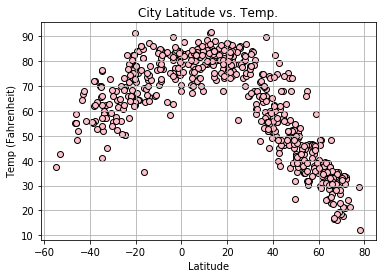

In [64]:
plt.scatter(lat, max_temp, marker="o", facecolors="pink", edgecolors="black")
plt.title("City Latitude vs. Temp.")
plt.xlabel("Latitude")
plt.ylabel("Temp (Fahrenheit)")
plt.grid()

plt.savefig("Images/LatvsTemp.png")


The City Latitude vs. Temp chart is showing that the closer to 0 degrees latitude you get the higher the temperature, and thr lower, or higher the latitude, the colder the temperature

## Latitude vs. Humidity Plot

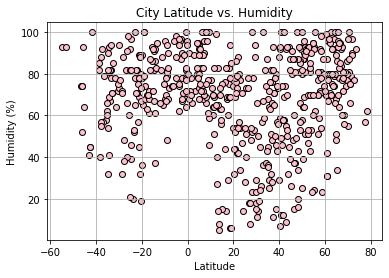

In [65]:
plt.scatter(lat, humidity, marker="o", facecolors="pink", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("Images/LatvsHumidity.png")


The City Latitude vs. Humidity chart is showing that there isn't a great correlation between latitude and humidity. However, one could draw the conclusion that the most humid regions lie between 40-60 degrees and -40 to 20 degrees.

## Latitude vs. Cloudiness Plot

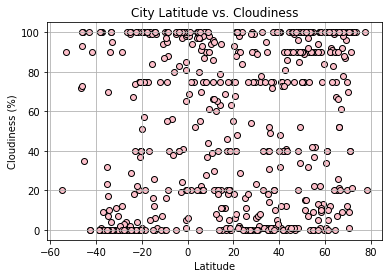

In [66]:
plt.scatter(lat, cloudiness, marker="o", facecolors="pink", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("Images/LatvsCloudiness.png")


The city latitude vs. cloudiness chart is showing that there is no great correlation between location and how cloudy it is. 

## Latitude vs. Wind Speed Plot

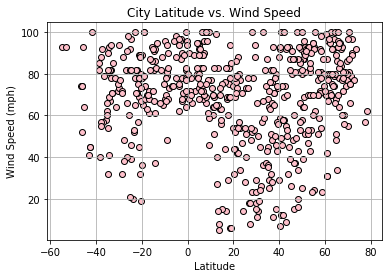

In [67]:
plt.scatter(lat, humidity, marker="o", facecolors="pink", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Images/LatvsWindSpeed.png")


The City latitude vs. wind speed chart shows that there isn't a correlation between latitude and wind speed. It varies greatly.

## Linear Regression

In [88]:
#make DF for northern and southern cities
northern_df = weather_df.loc[(weather_df["Lat"]) >= 0, :]
southern_df = weather_df.loc[(weather_df["Lat"]) < 0, :]

#assign values for northern df
x_values = (northern_df['Lat'])
y_values = (northern_df['Max Temp'])

#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * y_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.9x + 93.2
The r-squared is: -0.906404327577808
The regression displays a negative correlation.
In the nothern hemisphere, the further away you are from the equator, the colder it gets.


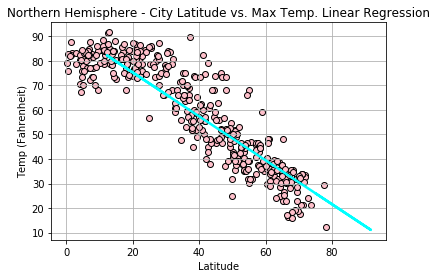

In [89]:
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, the further away you are from the equator, the colder it gets.")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Northern Hemisphere - City Latitude vs. Max Temp. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temp (Fahrenheit)")
plt.plot(y_values,w_fit,"-", linewidth = 2.5, color = "aqua")
plt.grid()

plt.savefig("Images/NorthernLatvsTemp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.57x + 81.59
The r-squared is: 0.6590878632176215
The regression displays a positive correlation.
It is suggesting that the Closer you are to the equator, the more humid it is, but it can't be both!!


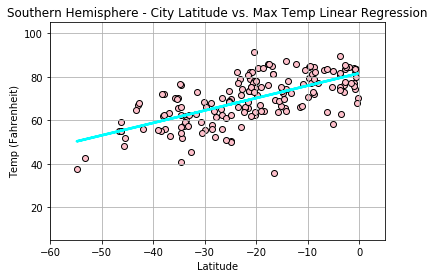

In [124]:
#assign values for northern df
x_values = (southern_df['Lat'])
y_values = (southern_df['Max Temp'])
#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * x_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("It is suggesting that the Closer you are to the equator, the more humid it is, but it can't be both!!")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Southern Hemisphere - City Latitude vs. Max Temp Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Temp (Fahrenheit)")
plt.grid()
plt.ylim(5,105)
plt.xlim(-60,5)
plt.plot(x_values,w_fit,"-", linewidth = 2.5, color = "aqua")

plt.savefig("Images/SouthernLatvsTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.16x + 60.92
The r-squared is: 0.13886208981034326
The regression displays a positive correlation.
It is suggesting that the further you are from the equator, the more humid it is.


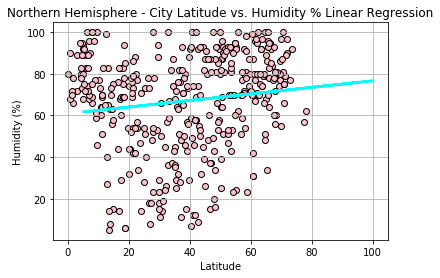

In [104]:
#assign values for northern df
x_values = (northern_df['Lat'])
y_values = (northern_df['Humidity'])

#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * y_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("It is suggesting that the further you are from the equator, the more humid it is.")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Northern Hemisphere - City Latitude vs. Humidity % Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(y_values,w_fit,"-", linewidth = 2.5, color = "aqua")
plt.grid()

plt.savefig("Images/NorthernLatvsHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 80.03
The r-squared is: 0.2143562776792619
The regression displays a positive correlation.
It is suggesting that the Closer you are to the equator, the more humid it is, but it can't be both!!


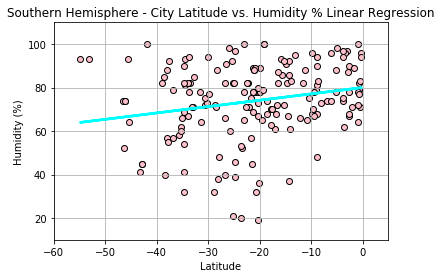

In [123]:
#assign values for northern df
x_values = (southern_df['Lat'])
y_values = (southern_df['Humidity'])
#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * x_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("It is suggesting that the Closer you are to the equator, the more humid it is, but it can't be both!!")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Southern Hemisphere - City Latitude vs. Humidity % Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.ylim(10,110)
plt.xlim(-60,5)
plt.plot(x_values,w_fit,"-", linewidth = 2.5, color = "aqua")

plt.savefig("Images/SouthernLatvsHumidity.png")

In [114]:
#assign values for northern df
x_values = (northern_df['Lat'])
y_values = (northern_df['Cloudiness'])


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.06x + 5.74
The r-squared is: 0.23001410222240712
The regression displays a negavtive correlation.
It is suggesting that the Closer you are to the equator, the more cloudy it is.


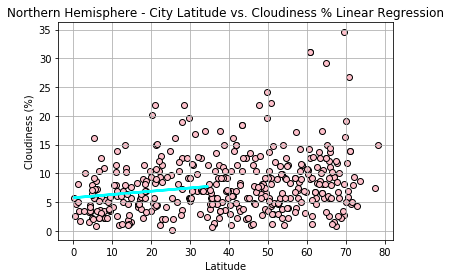

In [129]:

#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * y_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negavtive correlation.")
print("It is suggesting that the Closer you are to the equator, the more cloudy it is.")

plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness % Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(y_values,w_fit,"-", linewidth = 2.5, color = "aqua")
plt.grid()

plt.savefig("Images/NorthernLatvsCloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.79x + 62.02
The r-squared is: 0.24091344725777358
The regression displays a positive correlation.
It is suggesting that the Closer you are to the equator, the more cloudy it is.


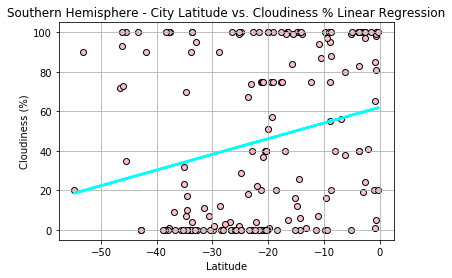

In [126]:
#assign values for northern df
x_values = (southern_df['Lat'])
y_values = (southern_df['Cloudiness'])

#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * x_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("It is suggesting that the Closer you are to the equator, the more cloudy it is.")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness % Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values,w_fit,"-", linewidth = 2.5, color = "aqua")
plt.grid()

plt.savefig("Images/SouthernLatvsCloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [127]:
#assign values for northern df
x_values = (northern_df['Lat'])
y_values = (northern_df['Wind Speed'])

#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * x_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

Regression line equation is: y = 0.06x + 5.74
The r-squared is: 0.23001410222240712
The regression displays a neutral correlation.


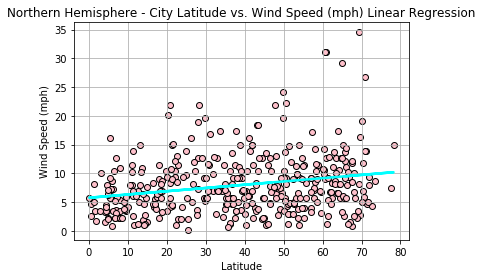

In [128]:


print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a neutral correlation.")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (mph) Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values,w_fit,"-", linewidth = 2.5, color = "aqua")
plt.grid()

plt.savefig("Images/NorthernLatvsWindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.07x + 5.42
The r-squared is: -0.19406755698877903
The regression displays a negative correlation.
It is suggesting that the closer you are to the equator, the more windy it is.


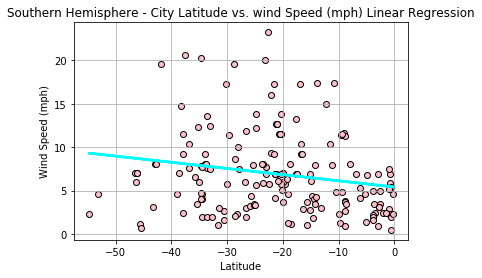

In [131]:
#assign values for northern df
x_values = (southern_df['Lat'])
y_values = (southern_df['Wind Speed'])

#line regression formulas
slope, w_int, rvalue, pvalue, std_err = linregress(x_values, y_values)
w_fit = slope * x_values + w_int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(w_int,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("It is suggesting that the closer you are to the equator, the more windy it is.")
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="black")
plt.title("Southern Hemisphere - City Latitude vs. wind Speed (mph) Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values,w_fit,"-", linewidth = 2.5, color = "aqua")
plt.grid()

plt.savefig("Images/SouthernLatvsWindSpeed.png")